In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
pwd

'/Users/paxton615/Github_Personal/Notes/Notes/Models/Linear'

In [4]:
data = pd.read_csv('/Users/paxton615/GA/resource-datasets/football_combine/combine_train.csv')
combine = pd.read_csv('/Users/paxton615/GA/resource-datasets/football_combine/combine_train.csv')

In [9]:
print(combine.dtypes)
print('-----------------------------------------')
print(combine.shape)
print('-----------------------------------------')
print(combine.head())
print('-----------------------------------------')
print(np.sum(combine.isnull()))
print('-----------------------------------------')
combine.describe()

id                     int64
Year                   int64
Name                  object
Position              object
HeightFeet             int64
HeightInches         float64
Weight                 int64
Arms                 float64
Hands                float64
FortyYD              float64
TwentyYD             float64
TenYD                float64
TwentySS             float64
ThreeCone            float64
Vertical             float64
Broad                  int64
Bench                  int64
Round                  int64
College               object
Pick                  object
PickRound              int64
PickTotal              int64
FirstName             object
LastName              object
HeightInchesTotal    float64
Wonderlic              int64
dtype: object
-----------------------------------------
(3237, 26)
-----------------------------------------
     id  Year             Name Position  HeightFeet  HeightInches  Weight  \
0  8984  2013  Quanterus Smith       DE           6         

,id,Year,HeightFeet,HeightInches,Weight,Arms,Hands,FortyYD,TwentyYD,TenYD,TwentySS,ThreeCone,Vertical,Broad,Bench,Round,PickRound,PickTotal,HeightInchesTotal,Wonderlic
count,3237.000000,3237.000000,3237.000000,3237.000000,3237.000000,3237.000000,3237.000000,3237.000000,3237.000000,3237.000000,3237.000000,3237.000000,3237.000000,3237.000000,3237.000000,3237.000000,3237.000000,3237.000000,3237.000000,3237.000000
mean,11370.508187,2006.590053,5.810009,4.313871,245.536917,8.185057,2.417323,4.655493,0.084442,0.141767,3.318622,1.328415,28.844764,96.344146,15.797034,2.374421,11.066420,70.283905,74.033982,1.164350
std,1527.898647,4.750154,0.392354,3.263213,45.458286,14.130919,4.170190,0.862494,0.461465,0.455483,1.895211,2.793105,11.434417,41.397067,10.846605,2.461207,12.308091,79.177560,2.577470,5.565893
min,8963.000000,1999.000000,5.000000,0.000000,160.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,66.000000,0.000000
25%,10105.000000,2002.000000,6.000000,2.000000,208.000000,0.000000,0.000000,4.530000,0.000000,0.000000,3.890000,0.000000,28.000000,101.000000,0.000000,0.000000,0.000000,0.000000,73.000000,0.000000
50%,11277.000000,2007.000000,6.000000,3.000000,237.000000,0.000000,0.000000,4.700000,0.000000,0.000000,4.240000,0.000000,32.500000,112.000000,18.000000,2.000000,6.000000,38.000000,74.000000,0.000000
75%,12423.000000,2011.000000,6.000000,6.000000,288.000000,29.375000,8.250000,4.990000,0.000000,0.000000,4.470000,0.000000,35.500000,119.000000,24.000000,4.000000,21.000000,132.000000,76.000000,0.000000
max,14926.000000,2014.000000,6.000000,11.875000,386.000000,37.750000,11.375000,6.050000,2.780000,1.920000,5.560000,8.310000,46.000000,139.000000,49.000000,7.000000,53.000000,259.000000,82.000000,48.000000


In [15]:
def correlation_heat_map(df):
    corrs = df.corr()

    # Set the default matplotlib figure size:
    fig, ax = plt.subplots(figsize=(16, 8))

    # Generate a mask for the upper triangle (taken from seaborn example gallery)
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Plot the heatmap with seaborn.
    # Assign the matplotlib axis the function returns. This will let us resize the labels.
    ax = sns.heatmap(corrs, mask=mask, annot=True)

    # Resize the labels.
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=45)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

    # If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
    plt.show()


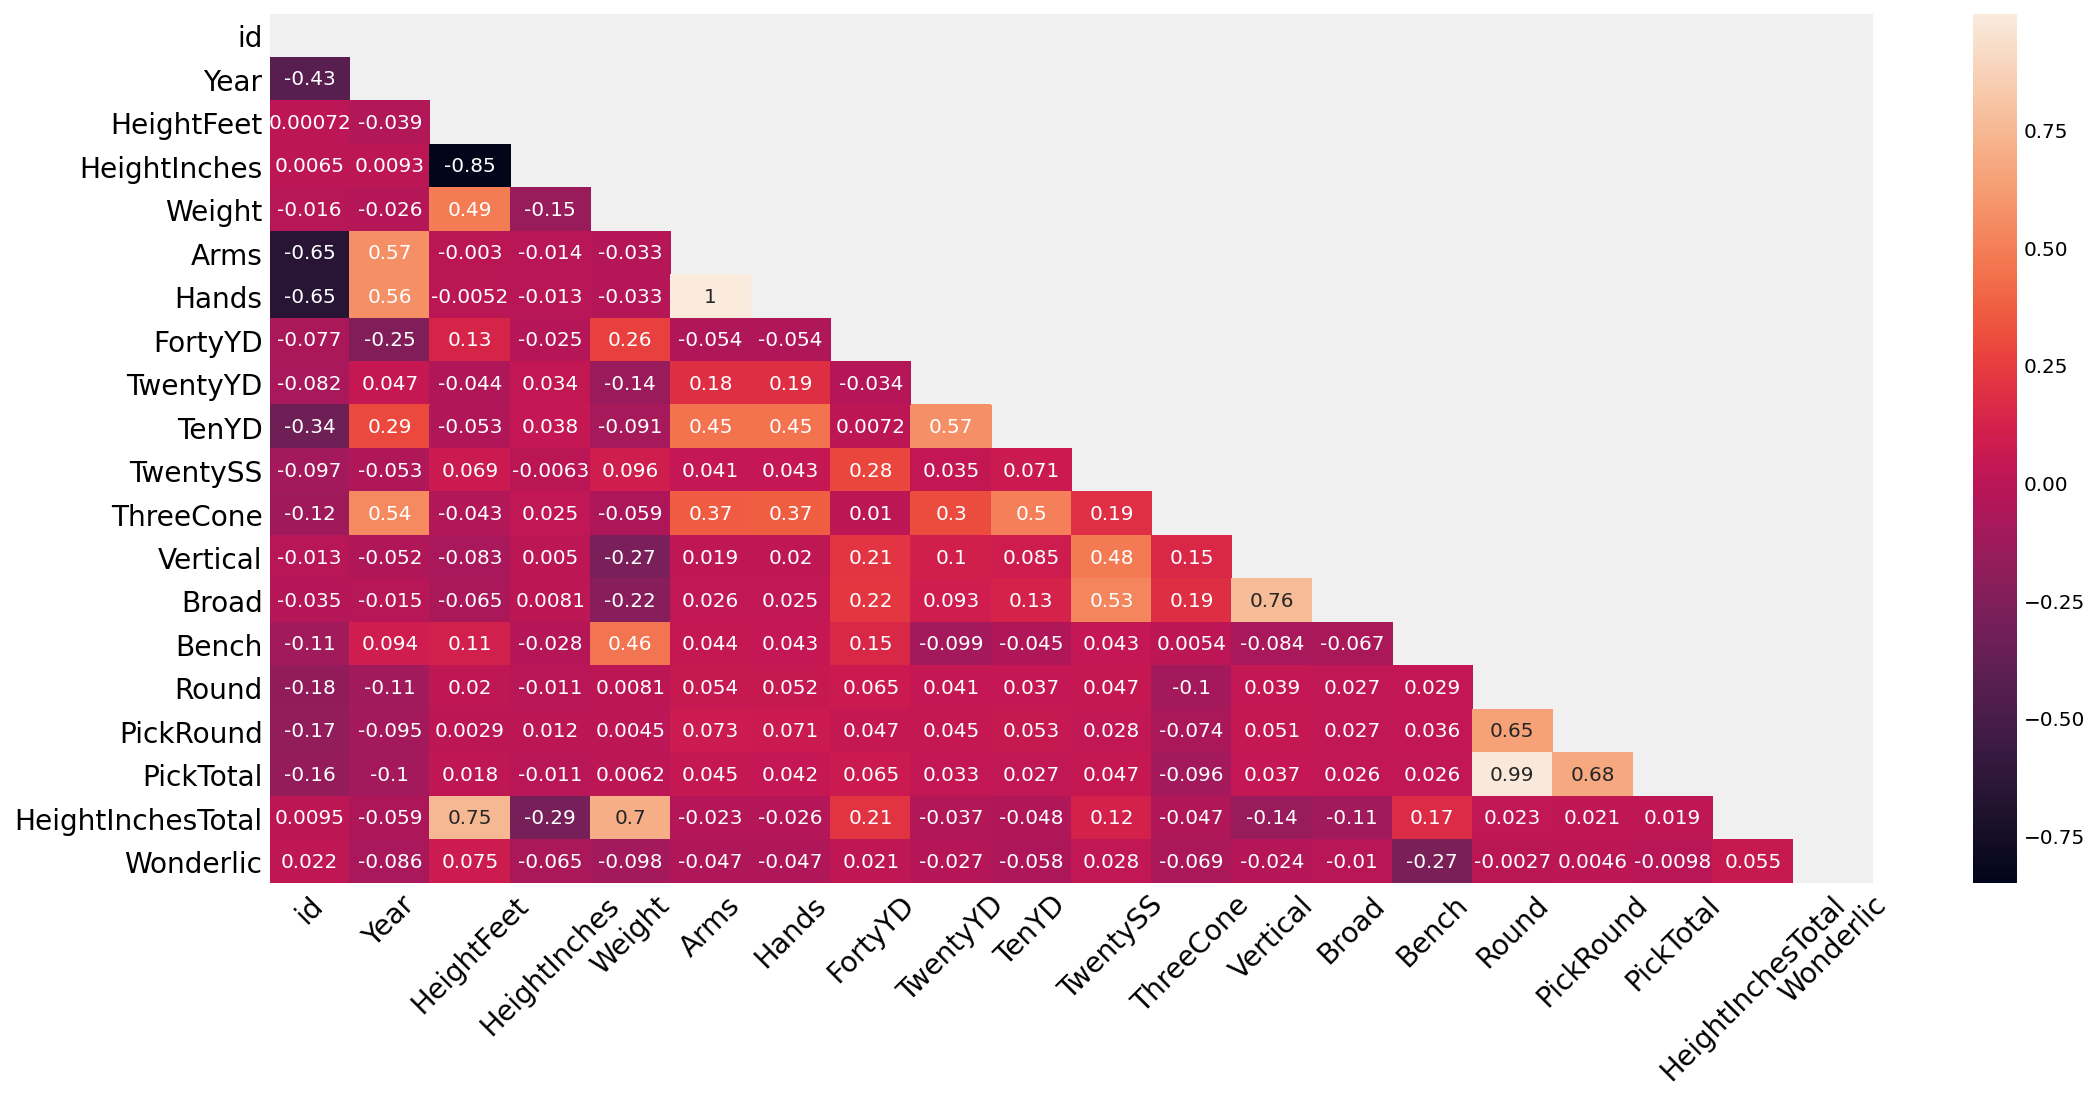

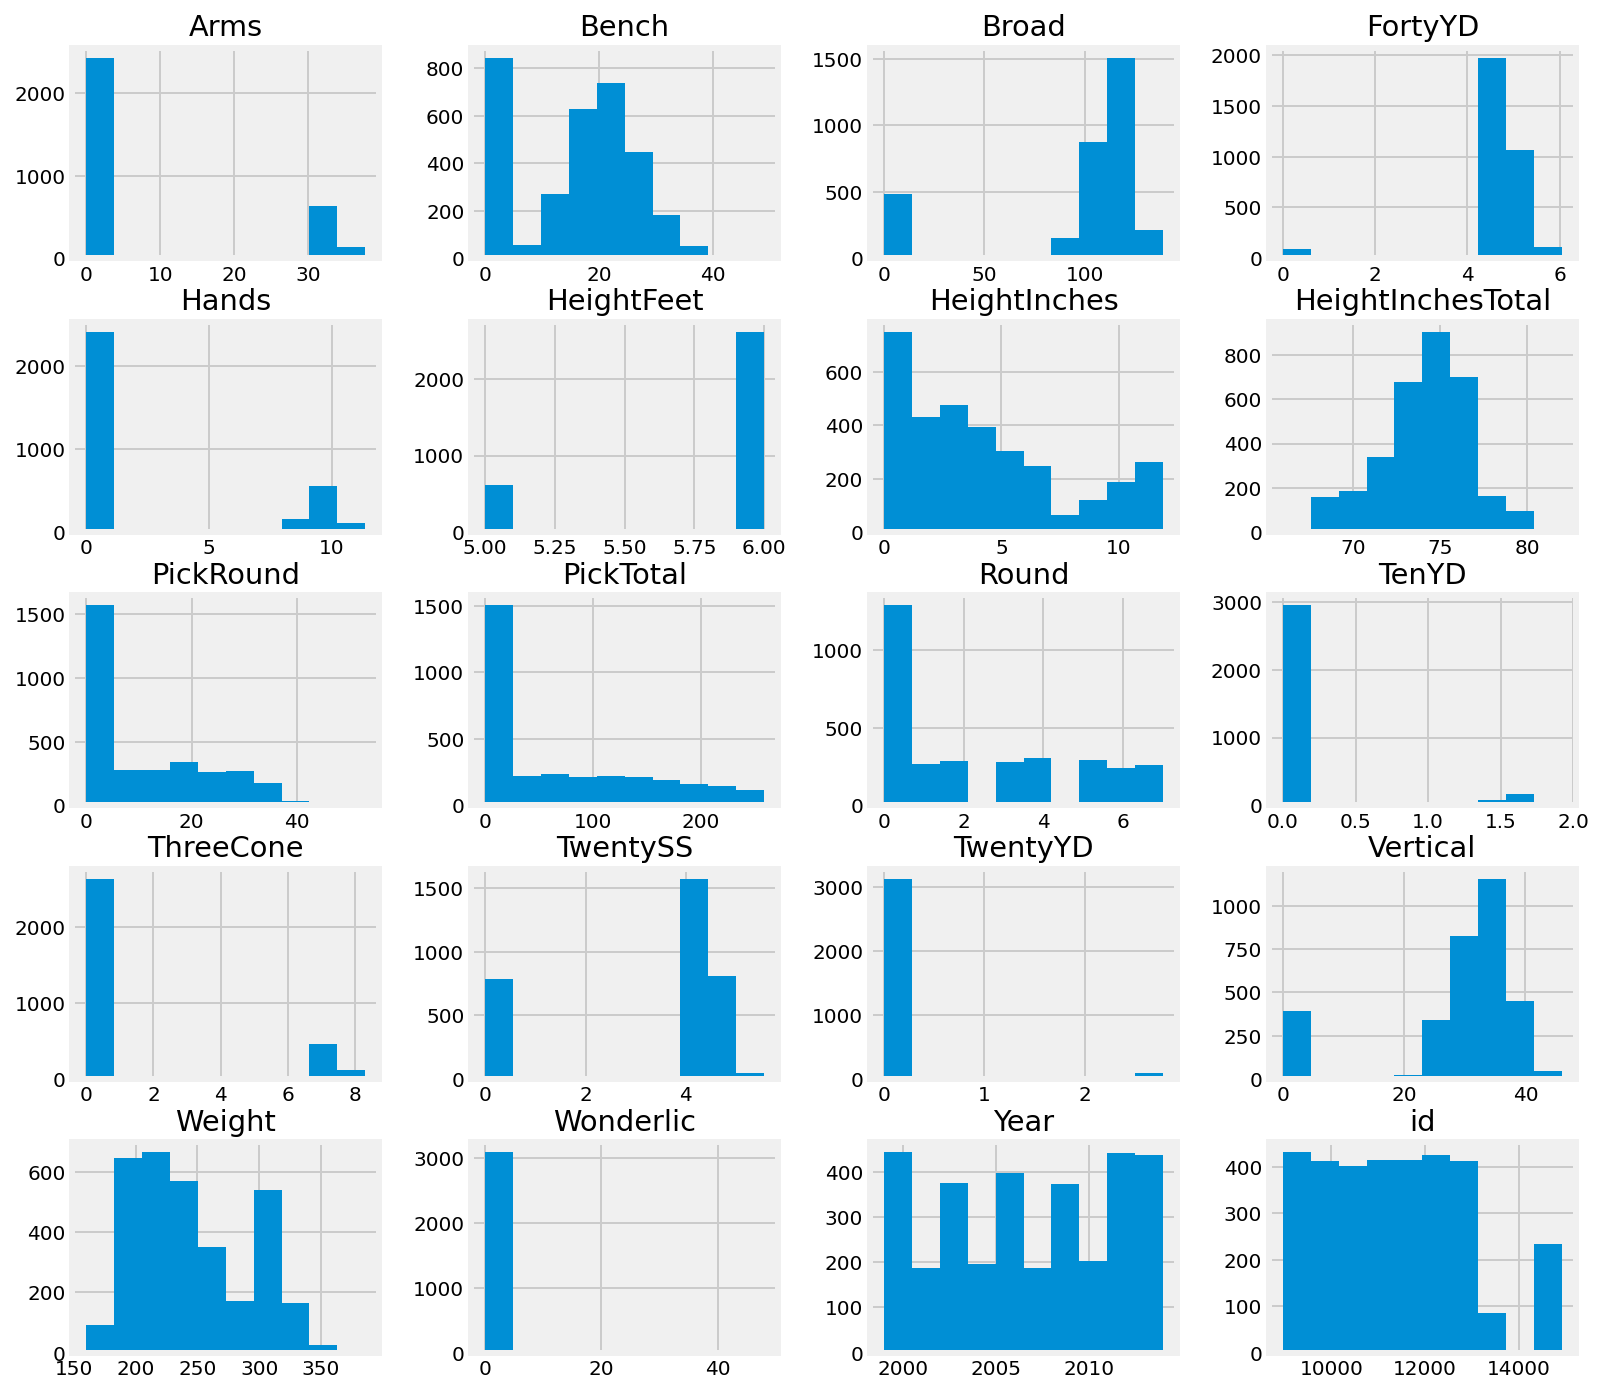

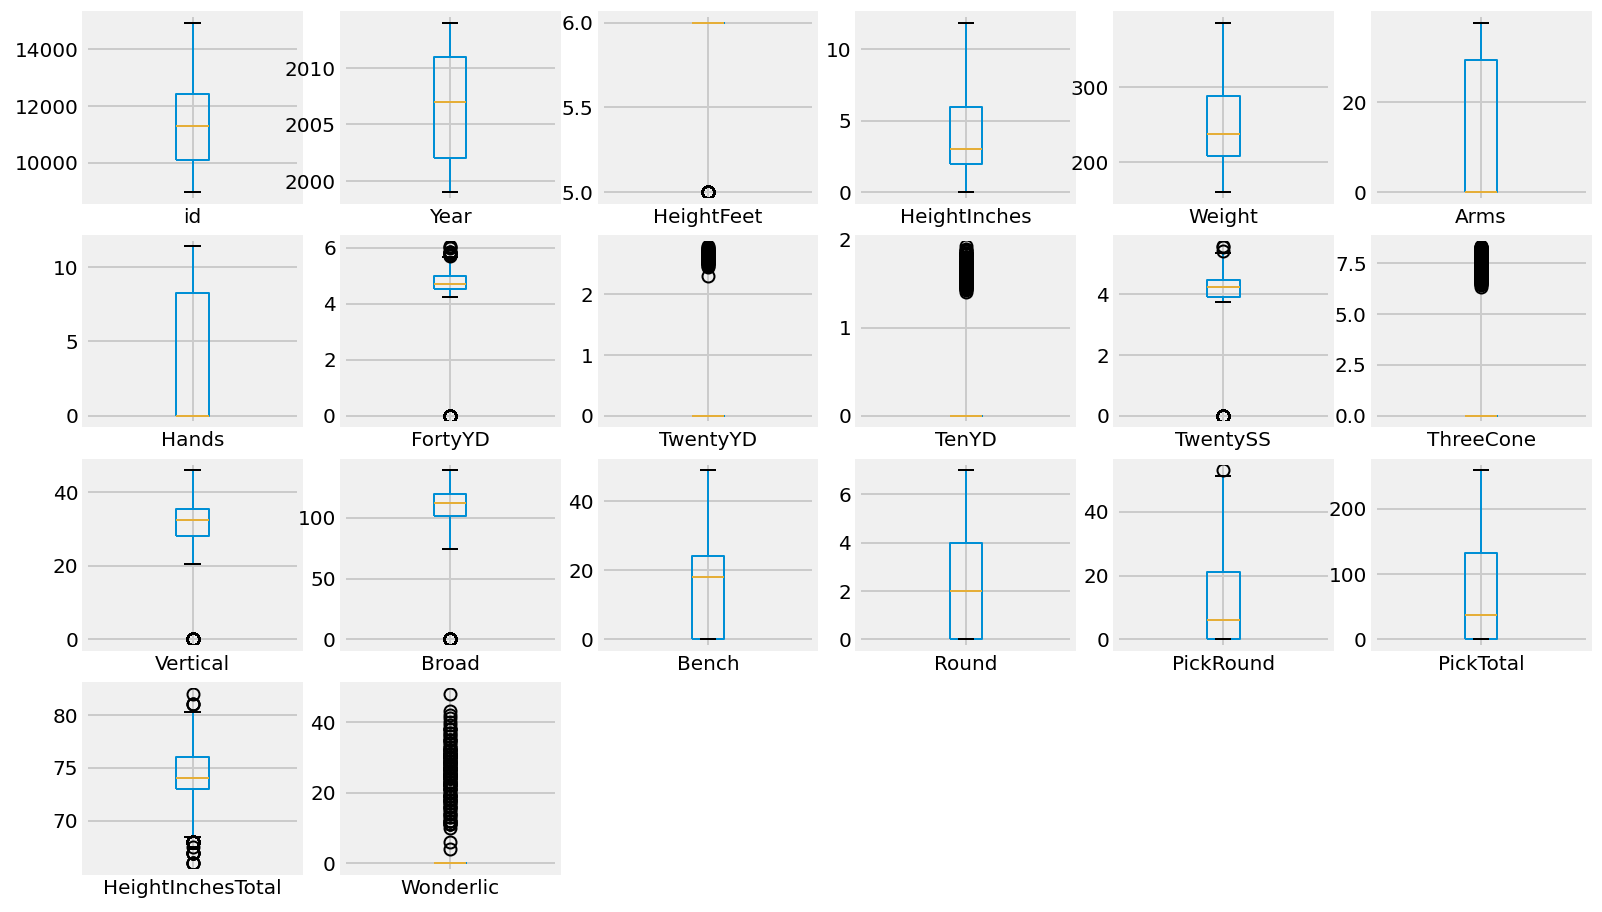

In [36]:
correlation_heat_map(combine) 
combine.hist(figsize=(12,12))
combine.plot(kind='box', subplots=True, layout=(6,6), figsize=(12,12))
plt.show()

#### focus on the position Wide Receiver

In [39]:
combine.Position.value_counts().head()

WR    423
RB    312
CB    308
DE    274
OT    260
Name: Position, dtype: int64

In [51]:
df = combine[combine['Position']== 'WR']

weight = df[['Weight']] # 注意这里的取值方式
height = df.HeightInchesTotal

- modeling with slr and statsmodes

In [285]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(weight, height)
print('intercept:', slr.intercept_)
print('coef:', slr.coef_)

intercept: 52.28918735135452
coef: [0.10275498]


In [286]:
import statsmodels.api as sm

st_model = sm.OLS(height, sm.add_constant(weight)) # 不同点，先输入y，还要给x加上intercept
result = st_model.fit()
result.params

const     52.289187
Weight     0.102755
dtype: float64

In [287]:
summary = result.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      HeightInchesTotal   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     397.8
Date:                Wed, 27 Jan 2021   Prob (F-statistic):           8.46e-63
Time:                        00:38:54   Log-Likelihood:                -792.28
No. Observations:                 423   AIC:                             1589.
Df Residuals:                     421   BIC:                             1597.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.2892      1.039     50.304      0.000      50.246      54.332
Weight         0.1028      0.005     19.946      0.000       0.093       0.113
==============================================================================
Omnibus:                        2.175   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.337   Jarque-Bera (JB):                2.055
Skew:                           0.170   Prob(JB):                        0.358
Kurtosis:                       3.034   Cond. No.                     2.73e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### MSE

In [288]:
from sklearn.metrics import mean_squared_error

In [289]:
height_pred = slr.predict(weight)

slr_mse = mean_squared_error(height, height_pred)
base_mse = mean_squared_error(height, np.repeat(np.mean(height), len(height)))
print('slr_mse:', slr_mse)
print("base_mse:", base_mse)

slr_mse: 2.4797057434350362
base_mse: 4.8230546403880865


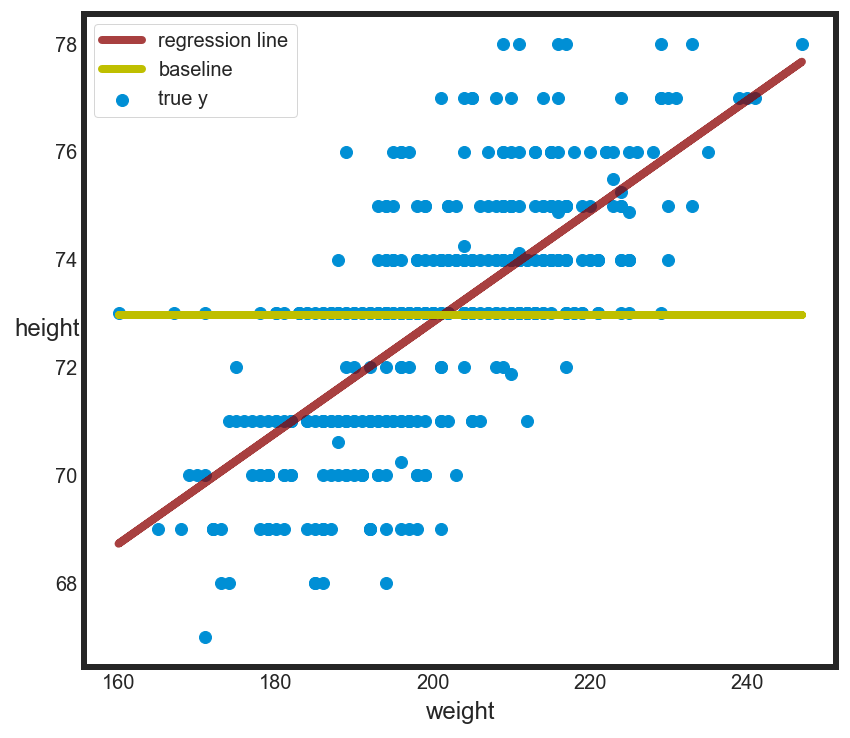

In [290]:
fig = plt.figure(figsize=(6,6))
plt.scatter(weight, height, label='true y')
plt.plot(weight, height_pred, c='darkred',alpha=0.75, label='regression line')
plt.plot(weight, np.repeat(np.mean(height), len(height)), 'y', label='baseline')
plt.xlabel('weight', fontsize=12)
plt.ylabel('height',fontsize=12, rotation=0)
plt.legend()
plt.show()

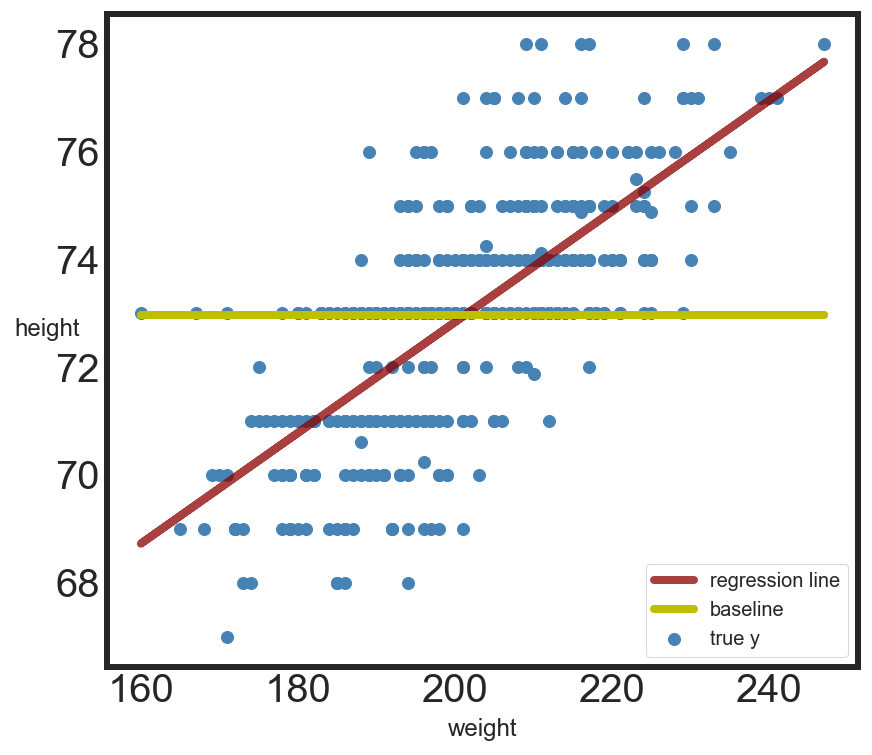

In [133]:
fig = plt.figure(figsize=(6,6))
ax = fig.gca()
ax.scatter(weight, height, label='true y', c='steelblue' )
ax.plot(weight, height_pred, c='darkred',alpha=0.75, label='regression line')
ax.plot(weight, np.repeat(np.mean(height), len(height)), 'y', label='baseline')
ax.set_xlabel('weight', fontsize=12)
ax.set_ylabel('height',fontsize=12, rotation=0)
ax.tick_params(axis='both', labelsize=20)
plt.legend(loc='lower right')
plt.show()

### R2

In [291]:
from sklearn.metrics import r2_score

In [292]:
r2 = r2_score(height, height_pred)
print('r2:', r2)

r2: 0.48586405746473005


### Remove outliers
根据正态分布，显著水平alpha=0.05的为检出水平，这样的outlier需特别留心。而alpha=0.01的，即可剔除。

In [260]:
hnw = pd.DataFrame({'weight':weight.Weight, 'height':height})
h_mean = hnw.height.mean()
h_std = hnw.height.std()
hnw['outlier'] = (np.abs(hnw.height - h_mean) > 1.5 * h_std)
len(hnw[hnw['outlier']==True])

56

In [254]:
# hnw['outlier_3'] = (np.abs(hnw.height - h_mean) > 2 * h_std)
# len(hnw[hnw['outlier_3']==True])

14

In [262]:
hnw = hnw[hnw['outlier']==False]

In [263]:
hnw

,weight,height,outlier
52,198,70.0,False
54,197,72.0,False
65,215,74.0,False
95,181,71.0,False
100,199,73.0,False
...,...,...,...
1915,194,71.0,False
1930,203,74.0,False
1951,194,70.0,False
1952,226,76.0,False


In [228]:
lr = LinearRegression()
lr.fit(hnw.weight.to_frame(), hnw.height)
print(lr.intercept_)
print(lr.coef_[0])

57.73390679889588
0.07608370553069703


In [231]:
no_outlier_pred = lr.predict(hnw.weight.to_frame())

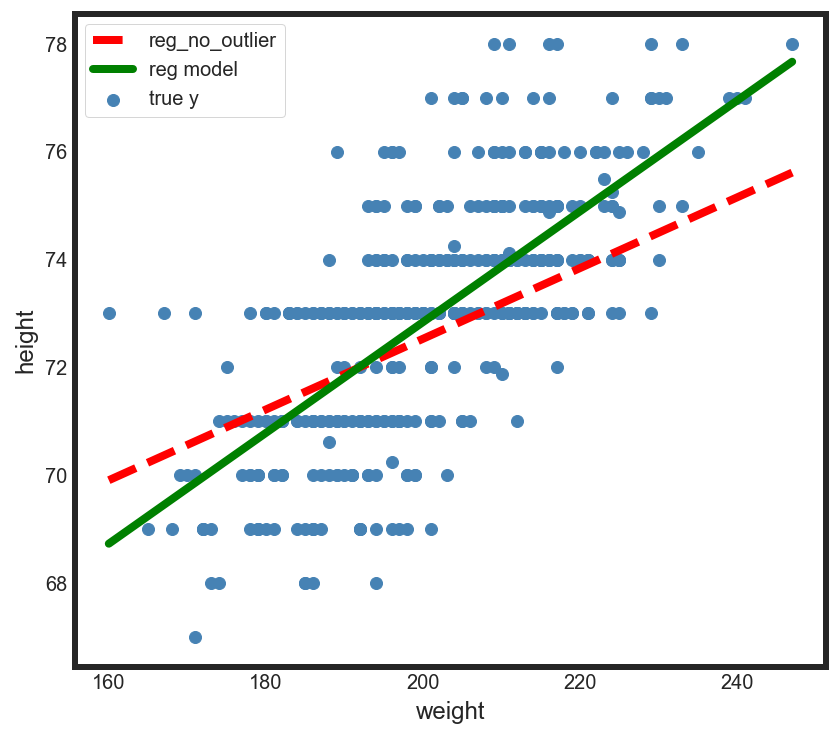

In [242]:
fig = plt.figure(figsize=(6,6))
ax = plt.gca()

ax.scatter(weight, height, label='true y', c='steelblue' )
ax.plot([weight.min(), weight.max()],[ no_outlier_pred.min(), no_outlier_pred.max()], 'r--', label='reg_no_outlier')
ax.plot([weight.min(), weight.max()],[height_pred.min(), height_pred.max()], c='g', label='reg model')
plt.legend()
ax.set_xlabel('weight')
ax.set_ylabel('height')
plt.show()

### 上图很明显功能看出，祛除了outlier的，竟然表现的不好。这点让我有点意外。

In [264]:
print('r2_reg_model:',r2_score(height, height_pred) )
print('r2_reg_no_outlier:',r2_score(hnw.height, no_outlier_pred) )

r2_reg_model: 0.48586405746473005
r2_reg_no_outlier: 0.3842613933300232


- r2 scores said the same thing, no_outlier model is worse

#### Examing residuals

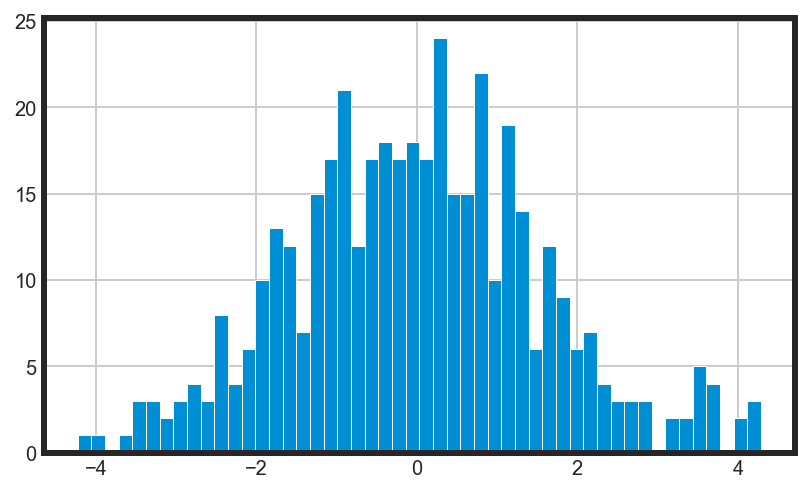

In [266]:
(height-height_pred).hist(bins=50);

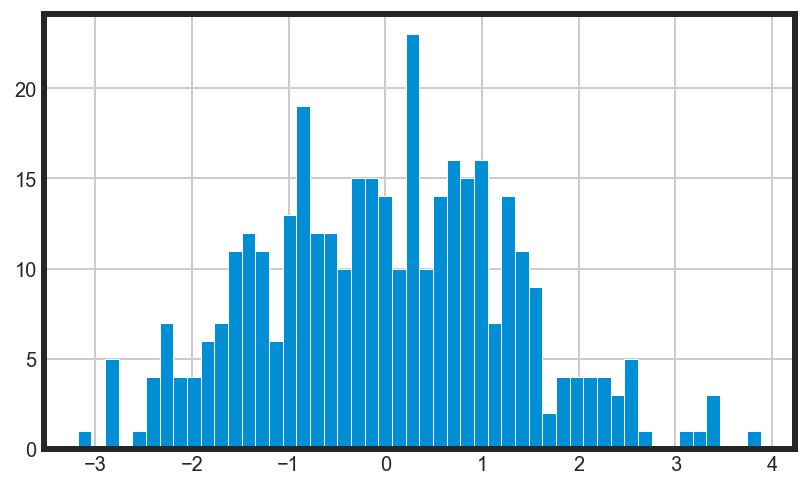

In [267]:
(hnw.height - no_outlier_pred).hist(bins=50);

### Get the $R^2$ value for your original model predicting values from the test data

In [269]:
combine_test = pd.read_csv('/Users/paxton615/GA/resource-datasets/football_combine/combine_test.csv')

In [270]:
# combine_test.shape

(1388, 26)

In [273]:
# combine_test.isnull().sum()

In [274]:
wr_test = combine_test[combine_test['Position']=='WR']

In [293]:
test_weight = wr_test[['Weight']]

In [294]:
test_height = wr_test['HeightInchesTotal']

In [295]:
test_pred = slr.predict(test_weight)

In [296]:
test_r2 = r2_score(test_height, test_pred)

In [299]:
print('r2_test:', test_r2)
print('r2_train:', r2)

r2_test: 0.51282726002876
r2_train: 0.48586405746473005


In [301]:
print('test_mse:', mean_squared_error(test_height, test_pred))
print('train_mse:', mean_squared_error(height, height_pred))

test_mse: 3.04386509669698
train_mse: 2.4797057434350362
